In [1]:
import numpy as np
import matplotlib.pyplot as plt

t = 0.0
x = 1.0
h = 0.5

for i in range(0, 4):
    x = x + (-2*t**3 + 12*t**2 - 20*t + 8.5)*h
    print(t, x)
    t = t + h

0.0 5.25
0.5 5.875
1.0 5.125
1.5 4.5


In [2]:
def f(x, t):
    return (-2.*t**3 + 12.*t**2 - 20.*t + 8.5)

def euler(x, t, h):
    return (x + f(x, t)*h)

def heun(x, t, h):
    xeuler = euler(x, t, h)
    correcao = f(xeuler, t + h)
    return (x + ((f(x, t) + correcao)/2.)*h)

def rk4(x, t, h):
    k1 = f(x, t)
    k2 = f(x + 0.5*k1*h, t + 0.5*h)
    k3 = f(x + 0.5*k2*h, t + 0.5*h)
    k4 = f(x +     k3*h, t +     h)
    return (x + (1./6.)*(k1 + 2.*k2 + 2.*k3 + k4)*h)

<function matplotlib.pyplot.show(close=None, block=None)>

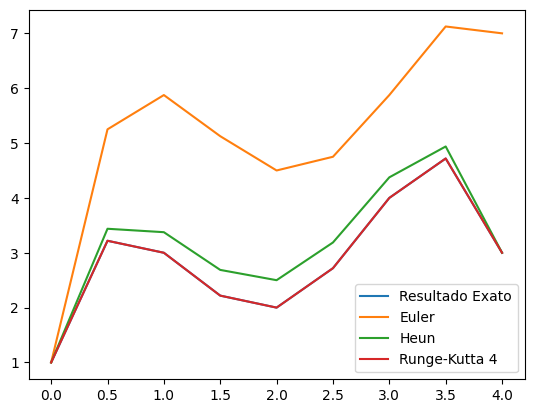

In [3]:
t = 0.0
x = 1.0
h = 0.5

N = 9

buffert = np.zeros(N)
buffereuler = np.zeros(N)
bufferheun = np.zeros(N)
bufferrk4 = np.zeros(N)
bufferexato = np.zeros(N)

for i in range(0, N):
    buffert[i] = t
    buffereuler[i] = x
    x = euler(x, t, h)
#    print(t, x)
    t = t + h
    
t = 0.0
x = 1.0
#h = 0.5

for i in range(0, N):
    bufferheun[i] = x
    x = heun(x, t, h)    
#    print(t, x)
    t = t + h
    
t = 0.0
x = 1.0
#h = 0.5

for i in range(0, N):
    bufferrk4[i] = x
    x = rk4(x, t, h)    
#    print(t, x)
    t = t + h
    
t = 0.0
x = 1.0
#h = 0.5

for i in range(0, N):
    x = -0.5*t**4 + 4.*t**3 - 10.*t**2 + 8.5*t + 1.
    bufferexato[i] = x    
#    print(t, x)
    t = t + h
    
#plt.plot(buffert, buffereuler, buffert, bufferexato, buffert, bufferheun, buffert, bufferrk4)
plt.plot(buffert, bufferexato, label = 'Resultado Exato')
plt.plot(buffert, buffereuler,  label = 'Euler')
plt.plot(buffert, bufferheun,  label = 'Heun')
plt.plot(buffert, bufferrk4, label = 'Runge-Kutta 4')

plt.legend()
plt.show